In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
#data = pd.read_csv('measures_v2.csv')
data = pd.read_csv('/content/drive/MyDrive/measures_v2.csv')
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Generate EWMAs for each feature
def add_ewma_features(df, span_values=[5, 10, 20, 50]):
    for span in span_values:
        for column in df.columns:
            ewma = df[column].ewm(span=span).mean()
            df[f'{column}_ewma_{span}'] = ewma
    return df

# Add EWMA features to the dataset
data_with_ewma = add_ewma_features(data_scaled)

# Display the first few rows of the preprocessed data
data_with_ewma.head()


<ipython-input-2-1495ccd25923>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_ewma_{span}'] = ewma
<ipython-input-2-1495ccd25923>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_ewma_{span}'] = ewma
<ipython-input-2-1495ccd25923>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,...,u_d_ewma_5_ewma_10_ewma_20_ewma_50,stator_tooth_ewma_5_ewma_10_ewma_20_ewma_50,motor_speed_ewma_5_ewma_10_ewma_20_ewma_50,i_d_ewma_5_ewma_10_ewma_20_ewma_50,i_q_ewma_5_ewma_10_ewma_20_ewma_50,pm_ewma_5_ewma_10_ewma_20_ewma_50,stator_yoke_ewma_5_ewma_10_ewma_20_ewma_50,ambient_ewma_5_ewma_10_ewma_20_ewma_50,torque_ewma_5_ewma_10_ewma_20_ewma_50,profile_id_ewma_5_ewma_10_ewma_20_ewma_50
0,-1.238979,-0.799812,-1.648158,0.392820,-1.681117,-1.184128,1.058337,-0.405855,-1.786837,-1.494244,...,0.392820,-1.681117,-1.184128,1.058337,-0.405855,-1.786837,-1.494244,-2.443386,-0.400838,-0.949994
1,-1.236150,-0.799197,-1.647959,0.393521,-1.681047,-1.184129,1.058278,-0.405867,-1.787686,-1.494323,...,0.392882,-1.681110,-1.184128,1.058332,-0.405856,-1.786912,-1.494251,-2.443387,-0.400771,-0.949994
2,-1.238757,-0.798729,-1.648064,0.392464,-1.681078,-1.184128,1.058289,-0.405854,-1.787338,-1.493755,...,0.392907,-1.681106,-1.184128,1.058328,-0.405857,-1.786965,-1.494243,-2.443388,-0.400738,-0.949994
3,-1.236180,-0.798417,-1.648285,0.393356,-1.681146,-1.184126,1.058270,-0.405836,-1.786847,-1.493529,...,0.392924,-1.681104,-1.184128,1.058324,-0.405857,-1.787001,-1.494226,-2.443389,-0.400713,-0.949994
4,-1.239442,-0.797432,-1.648303,0.393101,-1.681195,-1.184127,1.057279,-0.405455,-1.786248,-1.493738,...,0.392937,-1.681103,-1.184128,1.058316,-0.405854,-1.787021,-1.494206,-2.443390,-0.400693,-0.949994


In [3]:
len(data)

1330816

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Conv1D, Add, Flatten

# Define RNN Model
def build_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(50, return_sequences=True)(inputs)
    x = LSTM(50)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Define TCN Model
def build_tcn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=2, dilation_rate=1, padding='causal', activation='relu')(inputs)
    x = Conv1D(64, kernel_size=2, dilation_rate=2, padding='causal', activation='relu')(x)
    x = Flatten()(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Define Unified Model
def build_unified_model(input_shape):
    inputs = Input(shape=input_shape)
    # Shared layers
    x = Conv1D(64, kernel_size=2, dilation_rate=1, padding='causal', activation='relu')(inputs)
    x = LSTM(50, return_sequences=True)(x)
    # Separate heads
    stator_output = Dense(1, name='stator_output')(LSTM(50)(x))
    rotor_output = Dense(1, name='rotor_output')(Conv1D(64, kernel_size=2, dilation_rate=2, padding='causal', activation='relu')(x))
    model = Model(inputs, [stator_output, rotor_output])
    model.compile(optimizer='adam', loss='mse')
    return model


In [5]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
pip install tqdm

In [6]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Sample a subset of the data
subset_size = 10000  # Define the subset size
data_subset = data_with_ewma.sample(n=subset_size, random_state=42)
y_subset = data['stator_winding'].sample(n=subset_size, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_subset.values, y_subset.values, test_size=0.2, random_state=42)

# Define the hyperparameter search space
search_space = [
    Integer(10, 50, name='units'),  # Reduced the range for faster tuning
    Real(1e-5, 1e-3, "log-uniform", name='learning_rate')  # Reduced the range for faster tuning
]

# Objective function for Bayesian optimization
@use_named_args(search_space)
def objective(units, learning_rate):
    print(f"Training with units={units}, learning_rate={learning_rate}")
    model = build_rnn_model((X_train.shape[1], 1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    history = model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=1)  # Use fewer epochs for faster tuning
    mse = model.evaluate(X_test, y_test, verbose=0)
    print(f"Completed training with units={units}, learning_rate={learning_rate}, MSE={mse}")
    return mse

# Perform Bayesian optimization with progress bar
n_calls = 10  # Reduce the number of calls for faster tuning
with tqdm(total=n_calls) as pbar:
    def on_step(res):
        pbar.update(1)
    results = gp_minimize(objective, search_space, n_calls=n_calls, random_state=42, callback=[on_step])

# Display the best hyperparameters
print("Best hyperparameters:")
print(f"Units: {results.x[0]}")
print(f"Learning Rate: {results.x[1]}")


  0%|          | 0/10 [00:00<?, ?it/s]

Training with units=42, learning_rate=2.3273922280628698e-05
Epoch 1/3
250/250 [==============================] - 66s 232ms/step - loss: 5150.5063
Epoch 2/3
250/250 [==============================] - 45s 178ms/step - loss: 4791.3887
Epoch 3/3
250/250 [==============================] - 47s 187ms/step - loss: 4481.7026


 10%|█         | 1/10 [03:38<32:44, 218.27s/it]

Completed training with units=42, learning_rate=2.3273922280628698e-05, MSE=4470.30029296875
Training with units=41, learning_rate=0.0001562069367563987
Epoch 1/3
250/250 [==============================] - 46s 171ms/step - loss: 4392.3628
Epoch 2/3
250/250 [==============================] - 43s 173ms/step - loss: 3714.8052
Epoch 3/3
250/250 [==============================] - 49s 195ms/step - loss: 3483.5430


 20%|██        | 2/10 [06:10<23:55, 179.42s/it]

Completed training with units=41, learning_rate=0.0001562069367563987, MSE=3435.149169921875
Training with units=28, learning_rate=1.584710121043908e-05
Epoch 1/3
250/250 [==============================] - 45s 165ms/step - loss: 5159.4551
Epoch 2/3
250/250 [==============================] - 44s 176ms/step - loss: 5093.8774
Epoch 3/3
250/250 [==============================] - 44s 178ms/step - loss: 4641.8291


 30%|███       | 3/10 [08:43<19:30, 167.15s/it]

Completed training with units=28, learning_rate=1.584710121043908e-05, MSE=4539.5009765625
Training with units=28, learning_rate=4.649617447336329e-05
Epoch 1/3
250/250 [==============================] - 49s 183ms/step - loss: 5020.4385
Epoch 2/3
250/250 [==============================] - 47s 187ms/step - loss: 4347.3003
Epoch 3/3
250/250 [==============================] - 51s 204ms/step - loss: 4121.3306


 40%|████      | 4/10 [12:13<18:24, 184.11s/it]

Completed training with units=28, learning_rate=4.649617447336329e-05, MSE=4120.32177734375
Training with units=16, learning_rate=0.00020034427927560745
Epoch 1/3
250/250 [==============================] - 52s 190ms/step - loss: 4347.4854
Epoch 2/3
250/250 [==============================] - 45s 179ms/step - loss: 3700.2563
Epoch 3/3
250/250 [==============================] - 46s 184ms/step - loss: 3398.5066


 50%|█████     | 5/10 [14:43<14:20, 172.07s/it]

Completed training with units=16, learning_rate=0.00020034427927560745, MSE=3316.29150390625
Training with units=12, learning_rate=0.0002779697551526683
Epoch 1/3
250/250 [==============================] - 49s 178ms/step - loss: 4151.3149
Epoch 2/3
250/250 [==============================] - 46s 185ms/step - loss: 3421.3420
Epoch 3/3
250/250 [==============================] - 49s 195ms/step - loss: 3076.3081


 60%|██████    | 6/10 [17:12<10:56, 164.03s/it]

Completed training with units=12, learning_rate=0.0002779697551526683, MSE=2971.102783203125
Training with units=48, learning_rate=1.0035927878780922e-05
Epoch 1/3
250/250 [==============================] - 50s 185ms/step - loss: 5160.8965
Epoch 2/3
250/250 [==============================] - 45s 180ms/step - loss: 5148.4526
Epoch 3/3
250/250 [==============================] - 46s 184ms/step - loss: 5064.6685


 70%|███████   | 7/10 [19:37<07:53, 157.87s/it]

Completed training with units=48, learning_rate=1.0035927878780922e-05, MSE=4971.58984375
Training with units=50, learning_rate=0.00017177621112338383
Epoch 1/3
250/250 [==============================] - 51s 190ms/step - loss: 4389.3926
Epoch 2/3
250/250 [==============================] - 44s 174ms/step - loss: 3677.0139
Epoch 3/3
250/250 [==============================] - 44s 176ms/step - loss: 3427.9072


 80%|████████  | 8/10 [22:06<05:10, 155.14s/it]

Completed training with units=50, learning_rate=0.00017177621112338383, MSE=3372.0771484375
Training with units=34, learning_rate=1.0330768043240409e-05
Epoch 1/3
250/250 [==============================] - 49s 179ms/step - loss: 5158.0840
Epoch 2/3
250/250 [==============================] - 42s 166ms/step - loss: 5130.7954
Epoch 3/3
250/250 [==============================] - 48s 193ms/step - loss: 4935.8101


 90%|█████████ | 9/10 [24:36<02:33, 153.48s/it]

Completed training with units=34, learning_rate=1.0330768043240409e-05, MSE=4817.22900390625
Training with units=11, learning_rate=0.00011208547084229366
Epoch 1/3
250/250 [==============================] - 48s 178ms/step - loss: 4605.6890
Epoch 2/3
250/250 [==============================] - 42s 168ms/step - loss: 3937.4551
Epoch 3/3
250/250 [==============================] - 47s 188ms/step - loss: 3740.0957
Completed training with units=11, learning_rate=0.00011208547084229366, MSE=3715.43896484375


100%|██████████| 10/10 [26:58<00:00, 161.85s/it]

Best hyperparameters:
Units: 12
Learning Rate: 0.0002779697551526683


In [7]:
# Best hyperparameters found
best_units = results.x[0]
best_learning_rate = results.x[1]

# Train the final RNN model with the best hyperparameters
final_rnn_model = build_rnn_model((X_train.shape[1], 1))
final_rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate), loss='mse')
history_rnn = final_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Train the TCN model
final_tcn_model = build_tcn_model((X_train.shape[1], 1))
final_tcn_model.compile(optimizer='adam', loss='mse')
history_tcn = final_tcn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Train the Unified model
final_unified_model = build_unified_model((X_train.shape[1], 1))
final_unified_model.compile(optimizer='adam', loss='mse')
history_unified = final_unified_model.fit(X_train, [y_train, y_train], epochs=50, batch_size=32, validation_data=(X_test, [y_test, y_test]), verbose=1)


Epoch 1/50
250/250 [==============================] - 55s 209ms/step - loss: 4309.7607 - val_loss: 3889.8987
Epoch 2/50
250/250 [==============================] - 47s 188ms/step - loss: 3628.7991 - val_loss: 3487.4348
Epoch 3/50
250/250 [==============================] - 47s 189ms/step - loss: 3262.8828 - val_loss: 3153.3589
Epoch 4/50
250/250 [==============================] - 48s 190ms/step - loss: 2953.1265 - val_loss: 2859.0107
Epoch 5/50
250/250 [==============================] - 44s 177ms/step - loss: 2677.8296 - val_loss: 2595.8884
Epoch 6/50
250/250 [==============================] - 51s 203ms/step - loss: 2430.7534 - val_loss: 2358.6768
Epoch 7/50
250/250 [==============================] - 49s 198ms/step - loss: 2208.4150 - val_loss: 2145.5620
Epoch 8/50
250/250 [==============================] - 44s 176ms/step - loss: 2008.7638 - val_loss: 1953.8317
Epoch 9/50
250/250 [==============================] - 48s 191ms/step - loss: 1829.9484 - val_loss: 1782.1925
Epoch 10/50
250/250

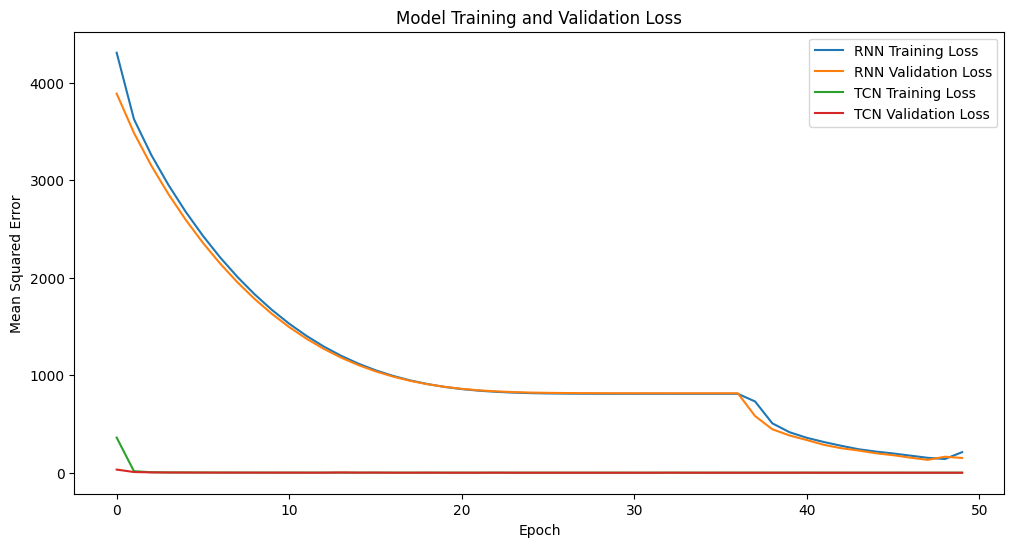

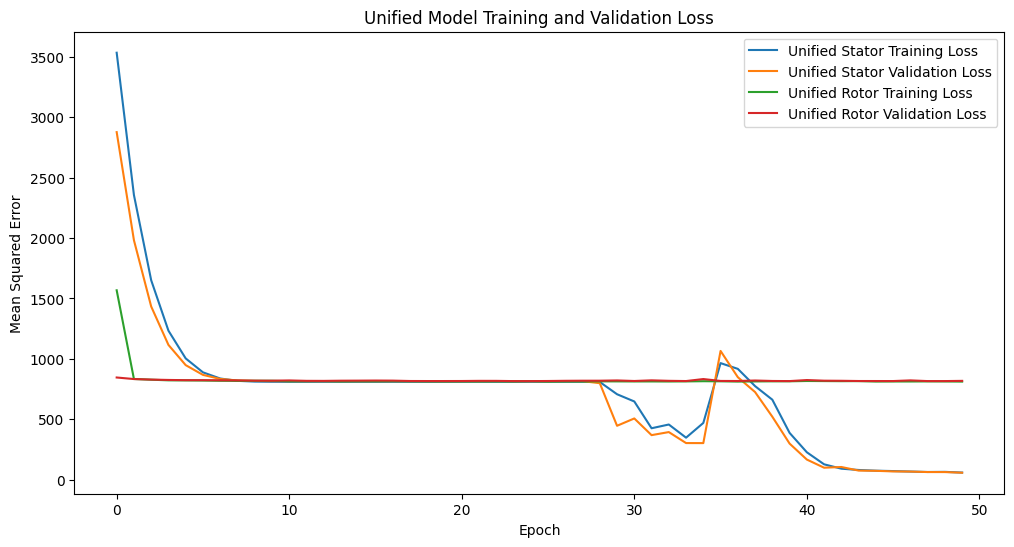

In [8]:
import matplotlib.pyplot as plt

# Plot MSE for RNN and TCN models
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.plot(history_tcn.history['loss'], label='TCN Training Loss')
plt.plot(history_tcn.history['val_loss'], label='TCN Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plot Learning Curves for Unified model
plt.figure(figsize=(12, 6))
plt.plot(history_unified.history['stator_output_loss'], label='Unified Stator Training Loss')
plt.plot(history_unified.history['val_stator_output_loss'], label='Unified Stator Validation Loss')
plt.plot(history_unified.history['rotor_output_loss'], label='Unified Rotor Training Loss')
plt.plot(history_unified.history['val_rotor_output_loss'], label='Unified Rotor Validation Loss')
plt.title('Unified Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import r2_score

# Get predictions for the RNN model
y_train_pred_rnn = final_rnn_model.predict(X_train)
y_test_pred_rnn = final_rnn_model.predict(X_test)

# Calculate R² score for the RNN model
r2_train_rnn = r2_score(y_train, y_train_pred_rnn)
r2_test_rnn = r2_score(y_test, y_test_pred_rnn)
print(f'R² score for RNN model - Train: {r2_train_rnn:.4f}, Test: {r2_test_rnn:.4f}')

# Get predictions for the TCN model
y_train_pred_tcn = final_tcn_model.predict(X_train)
y_test_pred_tcn = final_tcn_model.predict(X_test)

# Calculate R² score for the TCN model
r2_train_tcn = r2_score(y_train, y_train_pred_tcn)
r2_test_tcn = r2_score(y_test, y_test_pred_tcn)
print(f'R² score for TCN model - Train: {r2_train_tcn:.4f}, Test: {r2_test_tcn:.4f}')

# Get predictions for the Unified model
y_train_pred_unified = final_unified_model.predict(X_train)
y_test_pred_unified = final_unified_model.predict(X_test)

# Split the predictions for stator and rotor
y_train_pred_unified_stator, y_train_pred_unified_rotor = y_train_pred_unified
y_test_pred_unified_stator, y_test_pred_unified_rotor = y_test_pred_unified

# Ensure predictions have correct shape for R² calculation
y_train_pred_unified_stator = y_train_pred_unified_stator.squeeze()
y_test_pred_unified_stator = y_test_pred_unified_stator.squeeze()
y_train_pred_unified_rotor = y_train_pred_unified_rotor.squeeze()
y_test_pred_unified_rotor = y_test_pred_unified_rotor.squeeze()

# Option 1: Use the mean of the predictions
y_train_pred_unified_rotor_mean = y_train_pred_unified_rotor.mean(axis=1)
y_test_pred_unified_rotor_mean = y_test_pred_unified_rotor.mean(axis=1)

# Check the shapes of the true and predicted values
print(f'y_train shape: {y_train.shape}')
print(f'y_train_pred_unified_rotor_mean shape: {y_train_pred_unified_rotor_mean.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_test_pred_unified_rotor_mean shape: {y_test_pred_unified_rotor_mean.shape}')

# Calculate R² score for the Unified model - Stator
r2_train_unified_stator = r2_score(y_train, y_train_pred_unified_stator)
r2_test_unified_stator = r2_score(y_test, y_test_pred_unified_stator)
print(f'R² score for Unified model (Stator) - Train: {r2_train_unified_stator:.4f}, Test: {r2_test_unified_stator:.4f}')

# Calculate R² score for the Unified model - Rotor
r2_train_unified_rotor = r2_score(y_train, y_train_pred_unified_rotor_mean)
r2_test_unified_rotor = r2_score(y_test, y_test_pred_unified_rotor_mean)
print(f'R² score for Unified model (Rotor) - Train: {r2_train_unified_rotor:.4f}, Test: {r2_test_unified_rotor:.4f}')


63/63 [==============================] - 3s 49ms/step
R² score for RNN model - Train: 0.8083, Test: 0.8141
63/63 [==============================] - 1s 10ms/step
R² score for TCN model - Train: 0.9998, Test: 0.9999
63/63 [==============================] - 5s 85ms/step
y_train shape: (8000,)
y_train_pred_unified_rotor_mean shape: (8000,)
y_test shape: (2000,)
y_test_pred_unified_rotor_mean shape: (2000,)
R² score for Unified model (Stator) - Train: 0.9323, Test: 0.9291
R² score for Unified model (Rotor) - Train: 0.0349, Test: 0.0329
